<a href="https://colab.research.google.com/github/ErenB02/Proteomics_Project/blob/main/MSC_ml(PR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Libraries
import pandas as pd
import numpy as np


# **Cord Blood Analysis Models**


### **Import datasets**


In [ ]:
"""MSc Project 2025
   Eren Boybay
   01/08/2025"""

##BASELINE (cord blood)
#Full set of proteins
BL_prot = pd.read_csv("BL_prot_full.csv")

# #Full set of peptides
BL_pep = pd.read_csv("BL_pep_full.csv")

##################################################
# #Proteins + Clinical (combined)
BL_prot_comb = pd.read_csv("BL_prot_comb.csv")


# #Peptides + Clinical (combined)
BL_pep_comb = pd.read_csv("BL_pep_comb.csv")

###########################################################



In [ ]:
# #Check column classes and format
BL_prot
print(BL_prot.value_counts('Condition'))
print(BL_prot.iloc[0:5, 0:5])

#Remove BioReplicate Column as it isnt needed
print(BL_prot.shape)
del BL_prot['BioReplicate']
del BL_prot['Unnamed: 0']
print(BL_prot.shape)

Condition
Control    42
Case       22
Name: count, dtype: int64
   Unnamed: 0  BioReplicate      KLKB1       HEP2       A2MG
0           1             1  23.726412  23.995709  23.184520
1           2             2  24.327342  23.748462  24.511435
2           3             3  24.783129  24.488957  24.415013
3           4             4  23.847265  24.124445  24.272973
4           5             5  24.368995  23.986996  24.373690
(64, 39)
(64, 37)


In [ ]:
# #Check column classes and format (peptide)
print(BL_pep.value_counts('Condition'))
print(BL_pep.iloc[0:5, 0:5])

#Remove BioReplicate Column as it isnt needed
print(BL_pep.shape)
del BL_pep['BioReplicate']
del BL_pep['Unnamed: 0']

print(BL_pep.shape)

Condition
Control    42
Case       22
Name: count, dtype: int64
   Unnamed: 0  BioReplicate  GGDVASMYTPNAQYCQMR  TGAVSGHSLK  QCGHQISACHR
0           1             1           16.146845   16.218784    19.076642
1           2             2           18.040947   18.200679    20.857464
2           3             3           18.761069   16.923276    19.775531
3           4             4           17.506162   18.101221    16.258867
4           5             5           18.569204   18.282549    17.669371
(64, 1091)
(64, 1089)


### **Pre-processing & Feature Selection**

In [ ]:
#Remove trailing space (found in 'Case ')
BL_prot['Condition'] = BL_prot['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_prot.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


#Repeat for peptide
BL_pep['Condition'] = BL_pep['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_pep.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


/tmp/ipython-input-1099701665.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_prot.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)
/tmp/ipython-input-1099701665.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_pep.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


*Features and Target*

In [ ]:
#Features (all proteins)
X_prot =  BL_prot.iloc[:,:36]
#Label (Case - Control (object))
y_prot = BL_prot['Condition']
print(X_prot.shape)
print(y_prot.shape)


#Features (all peptides)
X_pep =  BL_pep.iloc[:,:1088]
y_pep = BL_pep['Condition']
print(X_pep.shape)
print(y_pep.shape)

(64, 36)
(64,)
(64, 1088)
(64,)


In [ ]:
#Check for NaN values
print(f"There are {X_prot.isna().sum().sum()} NaN values present in the peptide features")
print(f"There are {X_pep.isna().sum().sum()} NaN values present in the peptide features")

X_pep = X_pep.fillna(0)


There are 0 NaN values present in the peptide features
There are 2 NaN values present in the peptide features


##**Combined Data**

In [ ]:
# #Check column classes and format
print(BL_prot_comb.value_counts('Condition'))
print(BL_prot_comb.shape)

print(BL_prot_comb.describe())
BL_prot_comb.head(5)


Condition
Control    42
Case       22
Name: count, dtype: int64
(64, 63)
       Unnamed: 0  BioReplicate      KLKB1       HEP2       A2MG        IC1  \
count   64.000000     64.000000  64.000000  64.000000  64.000000  64.000000   
mean    33.734375     33.734375  24.139730  24.391843  24.074059  24.074538   
std     19.185181     19.185181   0.651814   0.636287   0.613451   0.602371   
min      1.000000      1.000000  21.859261  22.875634  22.154086  22.004957   
25%     17.750000     17.750000  23.756941  24.018992  23.867318  23.849801   
50%     33.500000     33.500000  24.272800  24.272800  24.272800  24.272800   
75%     50.250000     50.250000  24.617359  24.848195  24.430395  24.456579   
max     66.000000     66.000000  25.403335  25.930509  24.832673  24.797514   

            A2AP       FHR1       ANT3        CO9        CO2        FA9  \
count  64.000000  64.000000  64.000000  64.000000  64.000000  64.000000   
mean   24.160292  24.132500  24.109926  24.219416  24.085644  24.

Unnamed: 0  BioReplicate      KLKB1       HEP2       A2MG        IC1  \
0           1             1  23.726412  23.995709  23.184520  22.173751   
1           2             2  24.327342  23.748462  24.511435  23.598822   
2           3             3  24.783129  24.488957  24.415013  24.568131   
3           4             4  23.847265  24.124445  24.272973  23.822803   
4           5             5  24.368995  23.986996  24.373690  23.814763   

        A2AP       FHR1       ANT3        CO9        CO2        FA9  \
0  22.113733  22.309099  22.373840  23.141651  21.845234  21.974859   
1  23.028244  24.095794  23.806854  24.761661  23.456435  23.932758   
2  25.042863  25.118152  24.603673  26.654126  24.777946  24.532652   
3  23.993504  24.297272  24.011108  23.058305  23.560701  24.271186   
4  23.623496  23.878161  23.896840  22.948299  23.412159  23.880243   

        FA10       FA12       FIBA       PROC        VWF       KNG1  \
0  23.223237  24.265956  24.392916  22.263126  23.486043  22.631215   
1  24.223666  24.472566  24.513031  24.160379  24.170622  23.857088   
2  24.412387  25.459052  24.121615  24.405208  25.009297  24.602146   
3  24.883218  24.353985  24.756266  23.846590  24.067469  24.032287   
4  24.453881  23.213921  24.044129  24.192498  23.954856  23.947465   

       C4BPA       C1QC       C1RL        C1S       CO8G        C1R  \
0  22.489634  25.634119  22.164090  22.431149  23.695839  22.391026   
1  24.511907  23.333662  24.147319  24.032051  23.925236  24.190936   
2  25.048262  24.661247  24.988575  24.761202  24.300268  24.983051   
3  23.322101  23.786314  24.140205  24.077594  24.808493  23.999955   
4  23.428835  24.424850  24.165758  24.175785  24.586505  23.966733   

        CO4B       CFAB      MASP1        CO6        CO3        CO5  \
0  22.440749  22.467057  23.288003  22.802095  23.297040  22.251737   
1  24.292012  23.677396  24.165688  23.629539  24.212193  24.010016   
2  24.766060  24.990693  24.486249  24.957167  24.825249  24.903145   
3  24.180170  24.355515  24.503077  23.349927  23.574799  23.985264   
4  23.672856  23.635486  24.411344  23.883112  23.988913  23.959974   

         CO7       CO8A       CO8B       CFAI       THRB       PLMN  \
0  23.006130  22.663698  22.538259  22.878136  23.099690  22.158567   
1  23.948854  23.762534  24.048245  24.451903  23.885027  23.777078   
2  24.850204  25.168126  24.872542  24.780989  24.793993  25.105483   
3  23.935926  24.694108  24.269160  24.016967  24.115371  23.787266   
4  23.984667  24.286227  24.139663  24.201225  24.054598  23.817953   

        PROS       CFAH Maternal_BMI_15w GA_weeks    BW Child_BMI  \
0  22.421929  22.214525           #NULL!   #NULL!  2320    #NULL!   
1  23.738378  23.826445          30.1000     40.7  4130   20.1726   
2  24.784727  24.651487          22.4000     41.0  3400   19.1806   
3  24.373102  24.259599          19.5000     37.7  2660   15.1495   
4  23.655589  24.068244          29.8000     39.7  3700   17.3904   

   Maternal_age_delivery Paternal_age_delivery   Maternal.Occupation  \
0                     41                    33                   NaN   
1                     20                    24        Shop Assistant   
2                     28                    35  Credit Union Officer   
3                     28                    29                   NaN   
4                     38                #NULL!                 Nurse   

   f5_socioeconomic_index  Paternal.Occupation f14_socioeconomic_index  \
0                      21                  NaN                      34   
1                      20                Carer                      32   
2                      50  Security Consultant                      46   
3                      19      Bond Supervisor                      50   
4                      45          Electrician                  #NULL!   

  Child.underlying.med Specific.underlying Child.medication  \
0               #NULL!                 NaN           #NULL!  

In [ ]:
pd.set_option('display.max_columns', None)
print(BL_prot_comb.columns.tolist())


['Unnamed: 0', 'BioReplicate', 'KLKB1', 'HEP2', 'A2MG', 'IC1', 'A2AP', 'FHR1', 'ANT3', 'CO9', 'CO2', 'FA9', 'FA10', 'FA12', 'FIBA', 'PROC', 'VWF', 'KNG1', 'C4BPA', 'C1QC', 'C1RL', 'C1S', 'CO8G', 'C1R', 'CO4B', 'CFAB', 'MASP1', 'CO6', 'CO3', 'CO5', 'CO7', 'CO8A', 'CO8B', 'CFAI', 'THRB', 'PLMN', 'PROS', 'CFAH', 'Maternal_BMI_15w', 'GA_weeks', 'BW', 'Child_BMI', 'Maternal_age_delivery', 'Paternal_age_delivery', 'Maternal.Occupation', 'f5_socioeconomic_index', 'Paternal.Occupation', 'f14_socioeconomic_index', 'Child.underlying.med', 'Specific.underlying', 'Child.medication', 'Specify.child.meds', 'Alcohol_preg', 'f21c_pss', 'f39_uncomplicated_preg_lab', 'Mat_BMI_15wk_mean', 'Paracetamol', 'Maternal.medication', 'Maternal.meds.specific', 'Mat.Smoke.age11', 'Smoking_preg', 'Smoking_mat_combined', 'Condition']


In [ ]:
#Remove columns consisting of only 0
print(f"Prior to column removal: {BL_prot_comb.shape}")
print(f"Prior to column removal: {BL_pep_comb.shape}")


Prior to column removal: (64, 63)
Prior to column removal: (64, 1115)


In [ ]:
#Remove the other labels, retain only one to avoid data leakage (Condition)
del[BL_prot_comb['BioReplicate']]

del[BL_pep_comb['BioReplicate']]

#Remove redundant and unessecary columns (demographic data)
del BL_prot_comb['Unnamed: 0']


del BL_pep_comb['Unnamed: 0']

del[BL_prot_comb['Maternal.Occupation']]
del[BL_prot_comb['Paternal.Occupation']]
del[BL_prot_comb['Specific.underlying']]
del[BL_prot_comb['Specify.child.meds']]
del[BL_prot_comb['Maternal.meds.specific']]
del[BL_prot_comb['f39_uncomplicated_preg_lab']]


del[BL_pep_comb['Maternal.Occupation']]
del[BL_pep_comb['Paternal.Occupation']]
del[BL_pep_comb['Specific.underlying']]
del[BL_pep_comb['Specify.child.meds']]
del[BL_pep_comb['Maternal.meds.specific']]
del[BL_pep_comb['f39_uncomplicated_preg_lab']]




In [ ]:
BL_prot_comb = BL_prot_comb.loc[:, (BL_prot_comb != 0).any(axis=0)]
BL_pep_comb = BL_pep_comb.loc[:, (BL_pep_comb != 0).any(axis=0)]

print(f"After column removal: {BL_prot_comb.shape}")
print(f"After column removal: {BL_pep_comb.shape}")


After column removal: (64, 55)
After column removal: (64, 1107)


In [ ]:
#Check for NaN values
print(f"There are {BL_prot_comb.isna().sum().sum()} NaN values present in the combined protein features")
print(f"There are {BL_pep_comb.isna().sum().sum()} NaN values present in the combined peptide features")

#Replace #NULL! with NaN
BL_prot_comb.replace('#NULL!', np.nan, inplace=True)
BL_pep_comb.replace('#NULL!', np.nan, inplace=True)

#Replace NaN values with 0
BL_prot_comb = BL_prot_comb.fillna(0)
BL_pep_comb = BL_pep_comb.fillna(0)

There are 0 NaN values present in the combined protein features
There are 2 NaN values present in the combined peptide features


In [ ]:
#Select numeric columns only
numeric_cols_prot = BL_prot_comb.select_dtypes(include=[np.number]).columns
numeric_cols_pep = BL_pep_comb.select_dtypes(include=[np.number]).columns


#Replace all negatives values with 0
BL_prot_comb[numeric_cols_prot] = BL_prot_comb[numeric_cols_prot].clip(lower=0)
BL_pep_comb[numeric_cols_pep] = BL_pep_comb[numeric_cols_pep].clip(lower=0)

In [ ]:
#Remove trailing space (found in 'Case ')
BL_prot_comb['Condition'] = BL_prot_comb['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_prot_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


#Repeat for peptide
BL_pep_comb['Condition'] = BL_pep_comb['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_pep_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)

/tmp/ipython-input-3960454167.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_prot_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)
/tmp/ipython-input-3960454167.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_pep_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


In [ ]:
#Obtain label position (prot_comb)
print(BL_prot_comb.columns.get_loc('Condition'))
print(BL_prot_comb.shape)

54
(64, 55)


In [ ]:
#Obtain label position (prot_comb)
print(BL_pep_comb.columns.get_loc('Condition'))
print(BL_pep_comb.shape)

1106
(64, 1107)


In [ ]:
#Features (all proteins + clin data)
X_prot_comb =  BL_prot_comb.iloc[:,:54]

#Label (Case - Control (object))
y_prot_comb = BL_prot_comb['Condition']
print(f"Combined protein data feature and label shape: ")
print(X_prot_comb.shape)
print(y_prot_comb.shape)


#Features (all peptides + clin data)
X_pep_comb =  BL_pep_comb.iloc[:,:1106]

#Label (Case - Control (object))
y_pep_comb = BL_pep_comb['Condition']
print(f"Combined peptide data feature and label shape: ")
print(X_pep_comb.shape)
print(y_pep_comb.shape)


Combined protein data feature and label shape: 
(64, 54)
(64,)
Combined peptide data feature and label shape: 
(64, 1106)
(64,)


## **Clinical Data only**

In [ ]:
#Clinical data only (BASELINE)
BL_clin_dat = pd.read_csv("BASELINE_clin.csv")
BL_clin_dat.head(20)

Maternal_BMI_15w GA_weeks    BW Child_BMI  Maternal_age_delivery  \
0            #NULL!   #NULL!  2320    #NULL!                     41   
1           30.1000     40.7  4130   20.1726                     20   
2           22.4000     41.0  3400   19.1806                     28   
3           19.5000     37.7  2660   15.1495                     28   
4           29.8000     39.7  3700   17.3904                     38   
5            #NULL!   #NULL!  2800    #NULL!                     34   
6            #NULL!   #NULL!  3590    #NULL!                     33   
7           20.6000     37.1  2630   15.5709                     33   
8            #NULL!   #NULL!  3540    #NULL!                     30   
9            #NULL!   #NULL!  3210    #NULL!                     27   
10          29.4000     40.0  3650   19.9991                     30   
11          23.9000     37.4  2750   16.3629                     30   
12           #NULL!   #NULL!  3580    #NULL!                     30   
13          24.0000     41.3  3300   15.9763                     35   
14           #NULL!   #NULL!  3840    #NULL!                     29   
15           #NULL!   #NULL!  3800    #NULL!                     21   
16          37.3000     37.4  2950   18.2507                     34   
17           #NULL!   #NULL!  3820    #NULL!                     32   
18           #NULL!   #NULL!  3440    #NULL!                     25   
19          36.5000     39.9  3790    #NULL!                     28   

   Paternal_age_delivery    Maternal.Occupation  f5_socioeconomic_index  \
0                     33                    NaN                      21   
1                     24         Shop Assistant                      20   
2                     35   Credit Union Officer                      50   
3                     29                    NaN                      19   
4                 #NULL!                  Nurse                      45   
5                     35                    NaN                      68   
6                     34                    NaN                      43   
7                     38                    NaN                      51   
8                     35                    NaN                      60   
9                     28                    NaN                      45   
10                    30                 Driver                      45   
11                #NULL!                  Nurse                      50   
12                    34                    NaN                      49   
13                    39                    NaN                      50   
14                    30                    NaN                      62   
15                    23                    NaN                      22   
16                #NULL!  Sales Account MAnager                      50   
17                    37                    NaN                      61   
18                    25                    NaN                      18   
19                    37                    SNA                      29   

      Paternal.Occupation f14_socioeconomic_index Child.underlying.med  \
0                     NaN                      34               #NULL!   
1                   Carer                      32               0.0000   
2     Security Consultant                      46               0.0000   
3         Bond Supervisor                      50               0.0000   
4             Electrician                  #NULL!               0.0000   
5                     NaN                      43               #NULL!   
6                     NaN                      50               #NULL!   
7                Engineer                      56               0.0000   
8                     NaN                      49               #NULL!   
9                     NaN                      44               #NULL!   
10          Van Sales rep                      32               0.0000   
11  Electrical technician                  #NUL

In [ ]:
BL_clin_dat.dtypes


Maternal_BMI_15w               object
GA_weeks                       object
BW                              int64
Child_BMI                      object
Maternal_age_delivery           int64
Paternal_age_delivery          object
Maternal.Occupation            object
f5_socioeconomic_index          int64
Paternal.Occupation            object
f14_socioeconomic_index        object
Child.underlying.med           object
Specific.underlying            object
Child.medication               object
Specify.child.meds             object
Alcohol_preg                    int64
f21c_pss                       object
f39_uncomplicated_preg_lab      int64
Mat_BMI_15wk_mean             float64
Paracetamol                    object
Maternal.medication            object
Maternal.meds.specific         object
Mat.Smoke.age11                object
Smoking_preg                    int64
Smoking_mat_combined            int64
Condition                      object
dtype: object

In [ ]:
print(BL_clin_dat.columns.tolist())

['Maternal_BMI_15w', 'GA_weeks', 'BW', 'Child_BMI', 'Maternal_age_delivery', 'Paternal_age_delivery', 'Maternal.Occupation', 'f5_socioeconomic_index', 'Paternal.Occupation', 'f14_socioeconomic_index', 'Child.underlying.med', 'Specific.underlying', 'Child.medication', 'Specify.child.meds', 'Alcohol_preg', 'f21c_pss', 'f39_uncomplicated_preg_lab', 'Mat_BMI_15wk_mean', 'Paracetamol', 'Maternal.medication', 'Maternal.meds.specific', 'Mat.Smoke.age11', 'Smoking_preg', 'Smoking_mat_combined', 'Condition']


In [ ]:
# #Remove columns that are relevant to child (DONT TOUCH)

# del[BL_clin_dat['Birthweight']]
# del[BL_clin_dat['BMI_Child']]
# del[BL_clin_dat['f26_sex']]
# del[BL_clin_dat['f26_birthwgt']]
# del[BL_clin_dat['f26_head_circum']]
# del[BL_clin_dat['f26_length']]
del[BL_clin_dat['Maternal.Occupation']]
del[BL_clin_dat['Paternal.Occupation']]
del[BL_clin_dat['Specific.underlying']]
del[BL_clin_dat['Specify.child.meds']]
del[BL_clin_dat['Maternal.meds.specific']]
del[BL_clin_dat['f39_uncomplicated_preg_lab']]




In [ ]:
#Remove columns consisting of only 0
print(f"Prior to column removal: {BL_clin_dat.shape}")
BL_clin_dat = BL_clin_dat.loc[:, (BL_clin_dat != 0).any(axis=0)]
print(f"After column removal: {BL_clin_dat.shape}")

Prior to column removal: (66, 19)
After column removal: (66, 19)


In [ ]:
#Check for NaN values
print(f"There are {BL_clin_dat.isna().sum().sum()} NaN values present in the clinical features")

#Replace #NULL! with NaN
BL_clin_dat.replace('#NULL!', np.nan, inplace=True)

#Replace NaN values with 0
BL_clin_dat = BL_clin_dat.fillna(0)


There are 0 NaN values present in the clinical features


In [ ]:
#Select numeric columns only
numeric_cols_prot = BL_clin_dat.select_dtypes(include=[np.number]).columns


#Replace all negatives values with 0
BL_clin_dat[numeric_cols_prot] = BL_clin_dat[numeric_cols_prot].clip(lower=0)


In [ ]:
#Remove trailing space (found in 'Case ')
BL_clin_dat['Condition'] = BL_clin_dat['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_clin_dat.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


/tmp/ipython-input-1815288119.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_clin_dat.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


In [ ]:
#Obtain label position (prot_comb)
print(BL_clin_dat.columns.get_loc('Condition'))
print(BL_clin_dat.shape)

18
(66, 19)


In [ ]:
#Features (all proteins + clin data)
X_clin =  BL_clin_dat.iloc[:,:18]

#Label (Case - Control (object))
y_clin = BL_clin_dat['Condition']
print(f"Clinical data features and label shape: ")
print(X_clin.shape)
print(y_clin.shape)

Clinical data features and label shape: 
(66, 18)
(66,)


## **EW PIPLINE (filtered)**

### *Correlation Filter*

In [ ]:
#Create correlation matrix (pearson)
corr_matrix = X_prot_comb.corr().abs()

#Take upper traingle portion of matrix to avoid redundancy
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#Drop features that are higly correlated (>0.9)
drop_prot = [col for col in upper.columns if any(upper[col] > 0.9)]

#Drop highly correlated features and create filtered dataset
X_filt_prot_comb = X_prot_comb.drop(columns=drop_prot)



#Repeat for other features (peptides, combined, clinical, etc.)
corr_matrix = X_pep.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_pep = [col for col in upper.columns if any(upper[col] > 0.9)]
X_filt_pep = X_pep.drop(columns=drop_pep)


#Peptide combined
corr_matrix = X_pep_comb.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_pep_comb = [col for col in upper.columns if any(upper[col] > 0.9)]
X_filt_pep_comb = X_pep_comb.drop(columns=drop_pep_comb)



# #Clinical combined
# corr_matrix = X_clin.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# drop_clin = [col for col in upper.columns if any(upper[col] > 0.9)]
# X_filt_clin = X_clin.drop(columns=drop_clin)



In [ ]:
#Show results of filtering
print("Filtered protein combined dims:", X_filt_prot_comb.shape)
print(f"Number of features removed: {len(drop_prot)}")

print("Filtered peptide dims:", X_filt_pep.shape)
print(f"Number of features removed: {len(drop_pep)}")

print("Filtered peptide combined dims:", X_filt_pep_comb.shape)
print(f"Number of features removed: {len(drop_pep_comb)}")


# print("Filtered clinical dims:", X_filt_clin.shape)
# print(f"Number of features removed: {len(drop_clin)}")

Filtered protein combined dims: (64, 42)
Number of features removed: 12
Filtered peptide dims: (64, 947)
Number of features removed: 141
Filtered peptide combined dims: (64, 962)
Number of features removed: 144


### *CV fold: Train and Test Subsets*

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

k_prot = 5
k_pep = 10
k_clin = 5

#Prepare CV fold iterations
skf_prot = RepeatedStratifiedKFold(n_splits=k_prot, n_repeats=10, random_state=25)
skf_pep = RepeatedStratifiedKFold(n_splits=k_pep, n_repeats=10, random_state=25)
skf_clin = RepeatedStratifiedKFold(n_splits=k_clin, n_repeats=10, random_state=25)


#Protein data
#Iterate over each fold and prepare train and test subsets for training and predictions
for prot_fold, (train_idx, test_idx) in enumerate(skf_prot.split(X_prot, y_prot)):
  #Subset training and test folds from particular dataset
    X_train_prot, X_test_prot = X_prot.iloc[train_idx], X_prot.iloc[test_idx]
    y_train_prot, y_test_prot = y_prot.iloc[train_idx], y_prot.iloc[test_idx]
    #Print dimensions of train and test
    print(f"Protein folds {prot_fold}: Training set shape {X_train_prot.shape}, Test set shape {X_test_prot.shape}")

#Combined protein dataset
for prot_comb_fold, (train_idx, test_idx) in enumerate(skf_prot.split(X_filt_prot_comb, y_prot_comb)):
    X_train_prot_comb, X_test_prot_comb = X_filt_prot_comb.iloc[train_idx], X_filt_prot_comb.iloc[test_idx]
    y_train_prot_comb, y_test_prot_comb = y_prot_comb.iloc[train_idx], y_prot_comb.iloc[test_idx]
    print(f"Combined protein folds {prot_comb_fold}: Training set shape {X_train_prot_comb.shape}, Test set shape {X_test_prot_comb.shape}")

#Peptide Data
for pep_fold, (train_idx, test_idx) in enumerate(skf_pep.split(X_filt_pep, y_pep)):
    X_train_pep, X_test_pep = X_filt_pep.iloc[train_idx], X_filt_pep.iloc[test_idx]
    y_train_pep, y_test_pep = y_pep.iloc[train_idx], y_pep.iloc[test_idx]
    print(f"Peptide folds {pep_fold}: Training set shape {X_train_pep.shape}, Test set shape {X_test_pep.shape}")

#Peptide Combined Data
for pep_comb_fold, (train_idx, test_idx) in enumerate(skf_pep.split(X_filt_pep_comb, y_pep_comb)):
    X_train_pep_comb, X_test_pep_comb = X_filt_pep_comb.iloc[train_idx], X_filt_pep_comb.iloc[test_idx]
    y_train_pep_comb, y_test_pep_comb = y_pep_comb.iloc[train_idx], y_pep_comb.iloc[test_idx]
    print(f"Combined peptide folds {pep_comb_fold}: Training set shape {X_train_pep_comb.shape}, Test set shape {X_test_pep_comb.shape}")


# #Clinical Data
# for clin_fold, (train_idx, test_idx) in enumerate(skf_clin.split(X_filt_clin, y_clin)):
#     X_train_clin, X_test_clin = X_filt_clin.iloc[train_idx], X_filt_clin.iloc[test_idx]
#     y_train_clin, y_test_clin = y_clin.iloc[train_idx], y_clin.iloc[test_idx]
#     print(f"Clinical folds {clin_fold}: Training set shape {X_train_clin.shape}, Test set shape {X_test_clin.shape}")

Protein folds 0: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 1: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 2: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 3: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 4: Training set shape (52, 36), Test set shape (12, 36)
Protein folds 5: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 6: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 7: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 8: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 9: Training set shape (52, 36), Test set shape (12, 36)
Protein folds 10: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 11: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 12: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 13: Training set shape (51, 36), Test set shape (13, 36)
Protein folds 14

NameError: name 'X_filt_clin' is not defined

### *Volcano Filtering, Model Training and Prediction* - **LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import chi2
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc as auc_score, confusion_matrix

def volcano_analysis(X_train, y_train, dataset_name="GENERAL", p_threshold=0.05):
    """
    Perform volcano analysis to select features based on statistical significance.
    For clinical dataset or combined datasets (protein+clinical, peptide+clinical),
    perform chi-squared test on categorical features.
    For other datasets, perform t-test.

    Returns:
        selected_features: list of features passing the significance threshold
    """
    selected_features = []

    if dataset_name in ["Clinical Data", "Protein & Clinical Data", "Peptide & Clinical Data"]:
        # Chi-squared test expects non-negative feature values (categorical encoded)
        chi2_stats, p_values = chi2(X_train, y_train)
        selected_features = X_train.columns[p_values < p_threshold].tolist()
        print(f"Chi-squared selected {len(selected_features)} features with p < {p_threshold}")

        if len(selected_features) == 0:
            print("Warning: No features selected by chi-squared test in clinical data.")

    else:
        # T-test for continuous features (proteins, peptides, etc.)
        for feature in X_train.columns:
            class_0 = X_train[y_train == 0][feature]
            class_1 = X_train[y_train == 1][feature]
            t_stat, p_val = stats.ttest_ind(class_0, class_1, nan_policy='omit')

            if p_val < p_threshold:
                selected_features.append(feature)

        if len(selected_features) == 0:
            print("Warning: No features selected by volcano (t-test) analysis.")

    return selected_features


# --- Your existing CV setup ---

k_prot = 5

cv_results = []

DATASET_NAME = "Protein & Clinical Data"  # Can be "PEPTIDE", "CLINICAL", etc.
USE_VOLCANO = True  # Enable volcano filtering (chi2 or t-test depending on dataset)

# Select dataset and CV splitter (example variables - replace with your data)
if DATASET_NAME == "Protein Full":
    X_data, y_data, skf_data, k_splits = X_prot, y_prot, skf_prot, k_prot
elif DATASET_NAME == "Peptide Full":
    X_data, y_data, skf_data, k_splits = X_filt_pep, y_pep, skf_pep, k_pep
elif DATASET_NAME == "Clinical Data":
    X_data, y_data, skf_data, k_splits = X_filt_clin, y_clin, skf_clin, k_clin
elif DATASET_NAME == "Protein & Clinical Data":
    X_data, y_data, skf_data, k_splits = X_filt_prot_comb, y_prot_comb, skf_prot, k_prot
elif DATASET_NAME == "Peptide & Clinical Data":
    X_data, y_data, skf_data, k_splits = X_filt_pep_comb, y_pep_comb, skf_pep, k_pep

print(f"=== {DATASET_NAME} DATA CROSS-VALIDATION PIPELINE ===")
print(f"Volcano filtering: {'ENABLED' if USE_VOLCANO else 'DISABLED'}")

# Fixed fold numbering - track repetitions and folds properly
total_iterations = 0
for train_idx, test_idx in skf_data.split(X_data, y_data):

    # Calculate current repetition and fold
    current_repetition = (total_iterations // k_splits) + 1
    current_fold = (total_iterations % k_splits) + 1

    print(f"\n--- REPETITION {current_repetition}, FOLD {current_fold}/{k_splits} ---")

    X_train, X_test = X_data.iloc[train_idx], X_data.iloc[test_idx]
    y_train, y_test = y_data.iloc[train_idx], y_data.iloc[test_idx]

    print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

    # Volcano filtering applied only if USE_VOLCANO is True
    if USE_VOLCANO:
        print("Performing volcano analysis...")
        selected_features = volcano_analysis(X_train, y_train, dataset_name=DATASET_NAME)

        if len(selected_features) == 0:
            print("No features selected by volcano/chi2 filtering. Falling back to top 50 by variance.")
            feature_variances = X_train.var()
            selected_features = feature_variances.nlargest(50).index.tolist()

        X_train_reduced = X_train[selected_features]
        X_test_reduced = X_test[selected_features]

        print(f"Selected {len(selected_features)} features.")
        print(f"Reduced training set shape: {X_train_reduced.shape}")

    else:
        print("Skipping volcano analysis - using all features.")
        X_train_reduced = X_train
        X_test_reduced = X_test
        selected_features = X_train.columns.tolist()
        print(f"Using all {len(selected_features)} features.")

    # Hyperparameter tuning with nested CV (inner 3-fold)
    param_grid = {'C': [0.01, 0.1, 1, 10]}

    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    lasso_logistic = LogisticRegression(
        penalty='l1',
        solver='liblinear',
        random_state=42,
        max_iter=1000
    )

    grid_search = GridSearchCV(
        lasso_logistic,
        param_grid,
        cv=inner_cv,
        scoring='roc_auc',
        n_jobs=-1
    )

    grid_search.fit(X_train_reduced, y_train)

    best_C = grid_search.best_params_['C']
    print(f"Best regularization parameter C: {best_C}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

    # Fit final model on full training subset with best hyperparameter
    final_model = LogisticRegression(
        penalty='l1',
        solver='liblinear',
        random_state=42,
        max_iter=1000,
        class_weight='balanced')

    final_model.fit(X_train_reduced, y_train)

    # Predictions and evaluation on test set
    y_pred = final_model.predict(X_test_reduced)
    y_pred_proba = final_model.predict_proba(X_test_reduced)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    fold_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test AUC: {fold_auc:.4f}")

    # Store fold results
    fold_results = {
        'repetition': current_repetition,
        'fold': current_fold,
        'total_iteration': total_iterations + 1,
        'n_features_selected': len(selected_features),
        'best_C': best_C,
        'best_cv_score': grid_search.best_score_,
        'test_accuracy': accuracy,
        'test_auc': fold_auc,
        'y_test': y_test,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'final_model': final_model
    }

    cv_results.append(fold_results)
    total_iterations += 1

# Existing CV summary
print("\n=== CROSS-VALIDATION SUMMARY ===")
results_df = pd.DataFrame(cv_results)
print(results_df[['repetition', 'fold', 'total_iteration', 'test_accuracy', 'test_auc', 'n_features_selected']])

print(f"\nMean Test Accuracy: {results_df['test_accuracy'].mean():.4f} ± {results_df['test_accuracy'].std():.4f}")
print(f"Mean Test AUC: {results_df['test_auc'].mean():.4f} ± {results_df['test_auc'].std():.4f}")
print(f"Mean Features Selected: {results_df['n_features_selected'].mean():.1f}")

# --- Compute mean sensitivity and specificity across folds ---
sensitivities = []
specificities = []

for fold in cv_results:
    tn, fp, fn, tp = confusion_matrix(fold['y_test'], fold['y_pred']).ravel()
    sens = tp / (tp + fn) if (tp + fn) > 0 else 0
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivities.append(sens)
    specificities.append(spec)

sensitivities = np.array(sensitivities)
specificities = np.array(specificities)

print(f"Mean Sensitivity: {sensitivities.mean():.4f} ± {sensitivities.std():.4f}")
print(f"Mean Specificity: {specificities.mean():.4f} ± {specificities.std():.4f}")

=== Protein & Clinical Data DATA CROSS-VALIDATION PIPELINE ===
Volcano filtering: ENABLED

--- REPETITION 1, FOLD 1/5 ---
Training set shape: (51, 42), Test set shape: (13, 42)
Performing volcano analysis...
Chi-squared selected 5 features with p < 0.05
Selected 5 features.
Reduced training set shape: (51, 5)
Best regularization parameter C: 10
Best CV score: 0.8232
Test Accuracy: 0.6923
Test AUC: 0.8611

--- REPETITION 1, FOLD 2/5 ---
Training set shape: (51, 42), Test set shape: (13, 42)
Performing volcano analysis...
Chi-squared selected 7 features with p < 0.05
Selected 7 features.
Reduced training set shape: (51, 7)
Best regularization parameter C: 0.1
Best CV score: 0.8182
Test Accuracy: 0.7692
Test AUC: 0.9444

--- REPETITION 1, FOLD 3/5 ---
Training set shape: (51, 42), Test set shape: (13, 42)
Performing volcano analysis...
Chi-squared selected 8 features with p < 0.05
Selected 8 features.
Reduced training set shape: (51, 8)
Best regularization parameter C: 0.1
Best CV score: 

In [ ]:
def plot_mean_roc_per_fold(cv_results, dataset_name="GENERAL", n_splits=None, use_volcano=False):
    """
    Plot mean ROC curves for each fold (averaged across repetitions)
    and the overall mean ROC curve. Only the overall mean AUC is shown in the legend.

    Parameters:
    - use_volcano: Boolean indicating if volcano filtering was used
    """
    from sklearn.metrics import roc_curve, auc as auc_score, roc_auc_score
    import numpy as np
    import matplotlib.pyplot as plt

    if n_splits is None:
        n_splits = max([res['fold'] for res in cv_results])

    mean_fpr = np.linspace(0, 1, 100)

    # Store interpolated TPRs and AUCs per fold index
    tprs_per_fold = {fold: [] for fold in range(1, n_splits + 1)}
    aucs_per_fold = {fold: [] for fold in range(1, n_splits + 1)}

    # Group results by fold and collect TPRs and AUCs
    for res in cv_results:
        fold_idx = res['fold']
        fpr, tpr, _ = roc_curve(res['y_test'], res['y_pred_proba'])
        fold_auc = roc_auc_score(res['y_test'], res['y_pred_proba'])

        # Interpolate TPR for consistent FPR grid
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0

        tprs_per_fold[fold_idx].append(interp_tpr)
        aucs_per_fold[fold_idx].append(fold_auc)

    plt.figure(figsize=(8, 6))

    # Define colors for each fold
    fold_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightgoldenrodyellow',
                   'lightpink', 'lightsteelblue', 'lightseagreen', 'lightyellow', 'lightgray']

    # Plot mean ROC curve for each fold (averaged across repetitions)
    fold_mean_tprs = []
    for fold in range(1, n_splits + 1):
        if len(tprs_per_fold[fold]) > 0:
            # Mean TPR across all repetitions for this fold
            fold_mean_tpr = np.mean(tprs_per_fold[fold], axis=0)
            fold_mean_tpr[-1] = 1.0
            fold_mean_tprs.append(fold_mean_tpr)

            # Plot individual fold mean curve with unique color
            color = fold_colors[(fold-1) % len(fold_colors)]
            plt.plot(mean_fpr, fold_mean_tpr, alpha=0.6, color=color, lw=1.5, label='_nolegend_')

    # Compute overall mean TPR across all folds
    overall_mean_tpr = np.mean(fold_mean_tprs, axis=0)
    overall_mean_tpr[-1] = 1.0

    # Compute overall mean AUC and standard error from cv_results
    all_test_aucs = [res['test_auc'] for res in cv_results]
    overall_mean_auc = np.mean(all_test_aucs)
    auc_std_error = np.std(all_test_aucs) / np.sqrt(len(all_test_aucs))

    # Plot overall mean ROC curve
    plt.plot(mean_fpr, overall_mean_tpr, color='b', lw=3,
             label=f"Mean AUC = {overall_mean_auc:.3f} ± {auc_std_error:.3f}")

    # Plot chance line
    plt.plot([0, 1], [0, 1], 'r--', lw=2, alpha=0.7, label='Chance')

    # Create dynamic title based on filtering status
    filter_status = "Filtered" if use_volcano else "No Filter"
    title = f"LASSO Logistic Regression ({filter_status}); {dataset_name}"

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"\nMean AUC: {overall_mean_auc:.4f} ± {auc_std_error:.4f}")

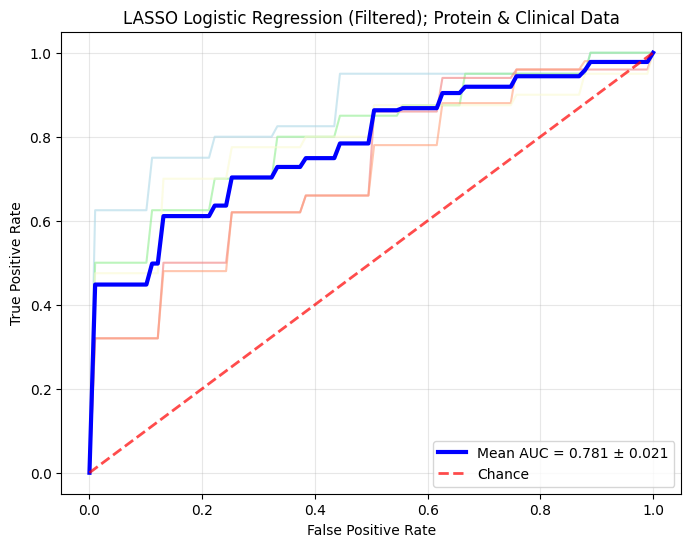


Mean AUC: 0.7807 ± 0.0209


In [ ]:
# For unfiltered results
plot_mean_roc_per_fold(cv_results, dataset_name=DATASET_NAME, n_splits=5, use_volcano=True)

# For filtered results
#plot_mean_roc_per_fold(cv_results, dataset_name="DATASET_NAME", n_splits=5, use_volcano=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_feature_importance_with_freq(cv_results, top_n=20, dataset_name="Dataset", use_volcano=False):
    """
    Plot feature importance across CV folds as **two separate plots**:
    1. Horizontal barplot of mean absolute coefficients with standard error bars
    2. Horizontal barplot of selection counts across folds
    """

    # --- Step 1: Collect all features across folds ---
    all_features = set()
    for fold in cv_results:
        if hasattr(fold['final_model'], 'feature_names_in_'):
            all_features.update(fold['final_model'].feature_names_in_)
        else:
            n_features = len(fold['final_model'].coef_[0])
            all_features.update([f'feature_{i}' for i in range(n_features)])
    all_features = list(all_features)
    if len(all_features) == 0:
        print("No features found across folds! Cannot plot feature importance.")
        return

    # --- Step 2: Collect coefficients and selection flags ---
    coefs_all_folds = []
    selected_flags = []
    for fold in cv_results:
        model = fold['final_model']
        model_features = list(model.feature_names_in_) if hasattr(model, 'feature_names_in_') else [f'feature_{i}' for i in range(len(model.coef_[0]))]
        coefs = np.zeros(len(all_features))
        selection_flag = np.zeros(len(all_features))
        for i, feature in enumerate(all_features):
            if feature in model_features:
                idx = model_features.index(feature)
                coefs[i] = abs(model.coef_[0][idx])
                selection_flag[i] = 1 if coefs[i] > 1e-6 else 0
        coefs_all_folds.append(coefs)
        selected_flags.append(selection_flag)

    coefs_all_folds = np.array(coefs_all_folds)
    selected_flags = np.array(selected_flags)

    # --- Step 3: Compute mean and standard error ---
    mean_coef = np.mean(coefs_all_folds, axis=0)
    stderr_coef = np.std(coefs_all_folds, axis=0) / np.sqrt(coefs_all_folds.shape[0])

    fimp_df = pd.DataFrame({
        "mean_importance": mean_coef,
        "stderr": stderr_coef
    }, index=all_features)

    # Get top features
    top_features_df = fimp_df[fimp_df["mean_importance"] > 1e-6].sort_values("mean_importance", ascending=False).head(top_n)
    top_feature_names = top_features_df.index.tolist()
    top_indices = [all_features.index(f) for f in top_feature_names]

    # --- Plot 1: Mean Absolute Coefficients ---
    plt.figure(figsize=(12, 8))
    means = top_features_df["mean_importance"].values
    std_errors_vals = top_features_df["stderr"].values
    plt.barh(top_feature_names, means, xerr=std_errors_vals, color=plt.cm.turbo_r(np.linspace(0, 1, len(top_feature_names))), alpha=0.7, capsize=5)
    plt.xlabel("Mean Absolute Coefficient")
    plt.title(f"Feature Importance LASSO - ({'Filtered' if use_volcano else 'No Filter'}); {dataset_name}")
    plt.gca().invert_yaxis()  # highest feature on top
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Feature Selection Counts ---
    total_folds = coefs_all_folds.shape[0]
    selection_counts = [np.sum(selected_flags[:, idx]) for idx in top_indices]
    plt.figure(figsize=(12, 8))
    plt.barh(top_feature_names, selection_counts, color='steelblue', alpha=0.7)
    plt.xlabel(f"Selection Count (out of {total_folds} folds)")
    plt.title(f"Feature Selection Count LASSO - ({'Filtered' if use_volcano else 'No Filter'}); {dataset_name}")
    plt.gca().invert_yaxis()
    plt.xlim(0, total_folds)
    plt.tight_layout()
    plt.show()


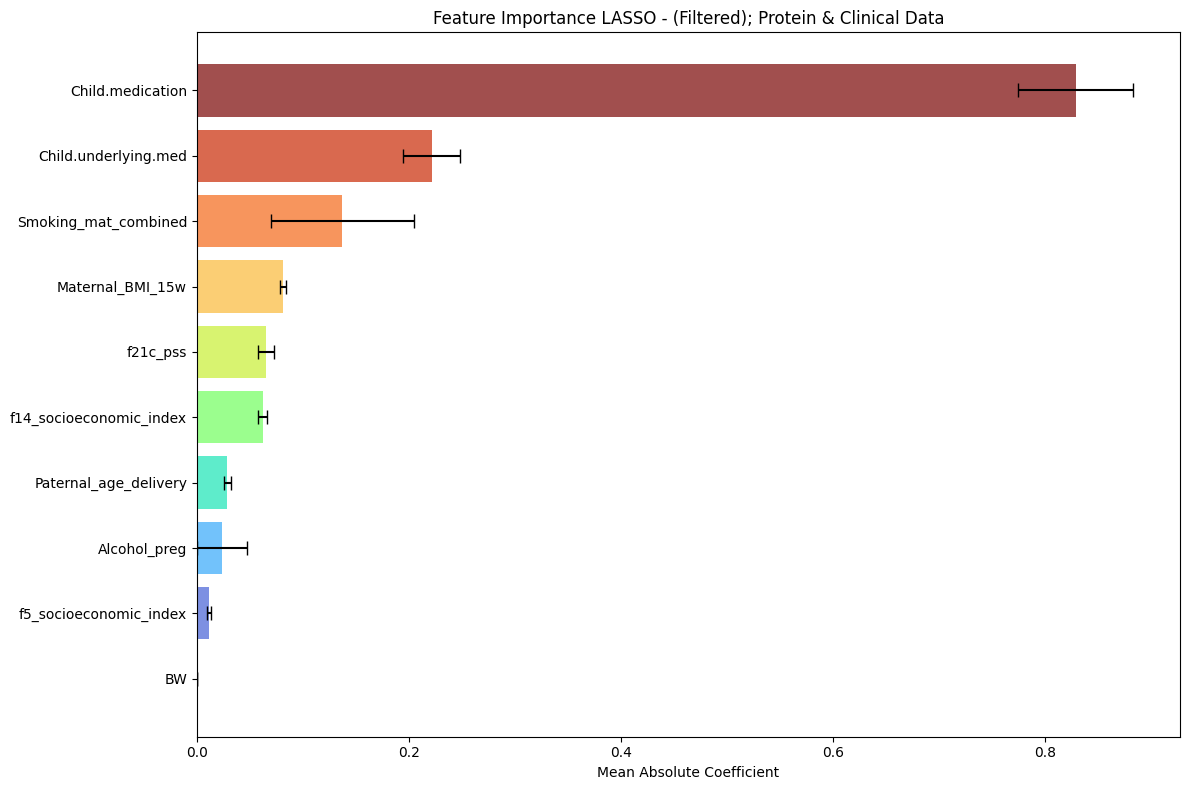

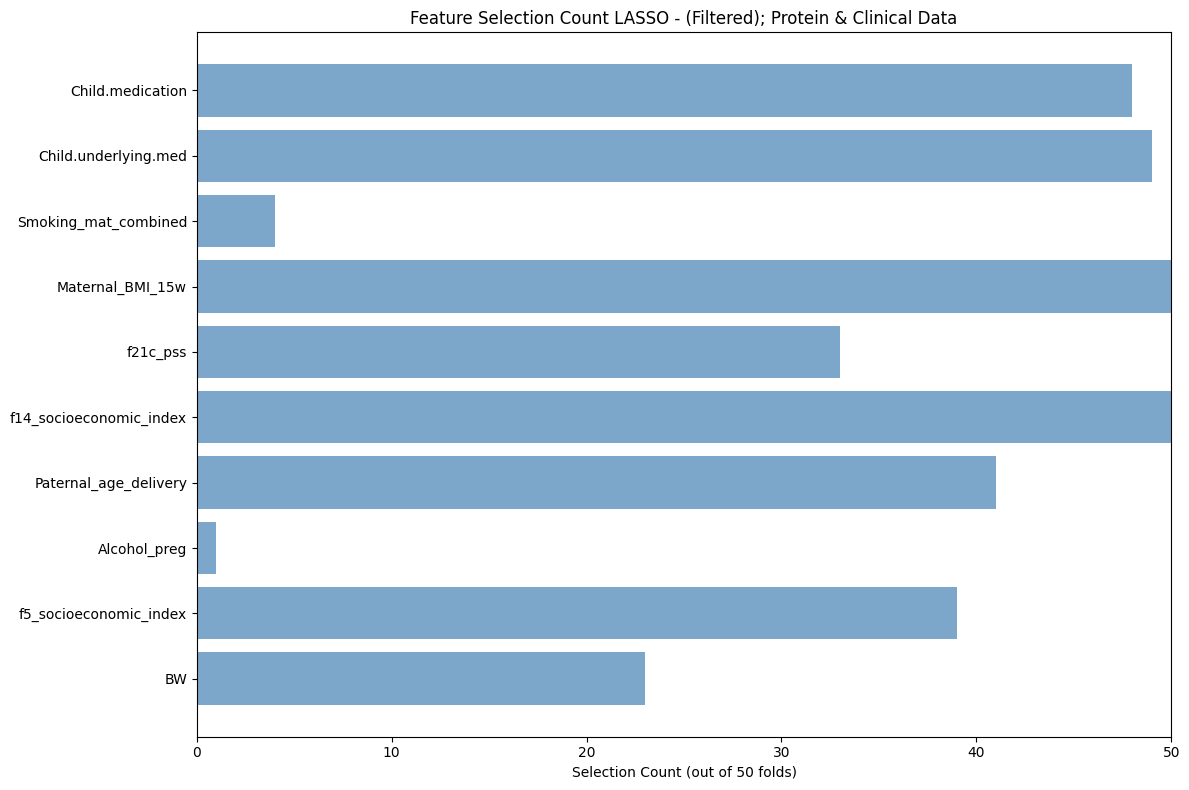

In [ ]:
# For unfiltered results
plot_feature_importance_with_freq(cv_results, top_n=20, dataset_name=DATASET_NAME , use_volcano=True)

# For filtered results
#plot_feature_importance_with_freq(cv_results, top_n=20, dataset_name="CLINICAL", use_volcano=True)


# **Serum Analysis Models**

In [ ]:
##PiRAMiD (serum)
#Full set of proteins
PM_prot_full = pd.read_csv(url)

#Full set of peptides
PM_pep_full = pd.read_csv(url)

#Proteins + Clinical (combined)
PM_prot_comb = pd.read_csv(url)
#Peptides + Clinical (combined)
PM_pep_comb = pd.read_csv(url)


# #Peptides (sig only)
# PM_pep_sig = pd.read_csv(url)


# #Peptides + Clinical (sig + clinical)
# PM_pep_sig_comb = pd.read_csv(url)